In [85]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
import scipy.io as sio
import numpy as np
import scipy
import os
import warnings
import pandas as pd
import glob
import pickle
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp
from scipy import signal

warnings.simplefilter(action='ignore', category=FutureWarning)

In [87]:
pathes = glob.glob(os.path.join('..', 'data', 'processed_data','*'))
frames = list()

for path in pathes:
    file_path =os.path.join(path, 'all_data.pkl')
    frames.append(pd.read_pickle(file_path))

ripples = pd.concat(frames, ignore_index=True)
length = [len(frame) for frame in frames]

300


<IPython.core.display.Javascript object>


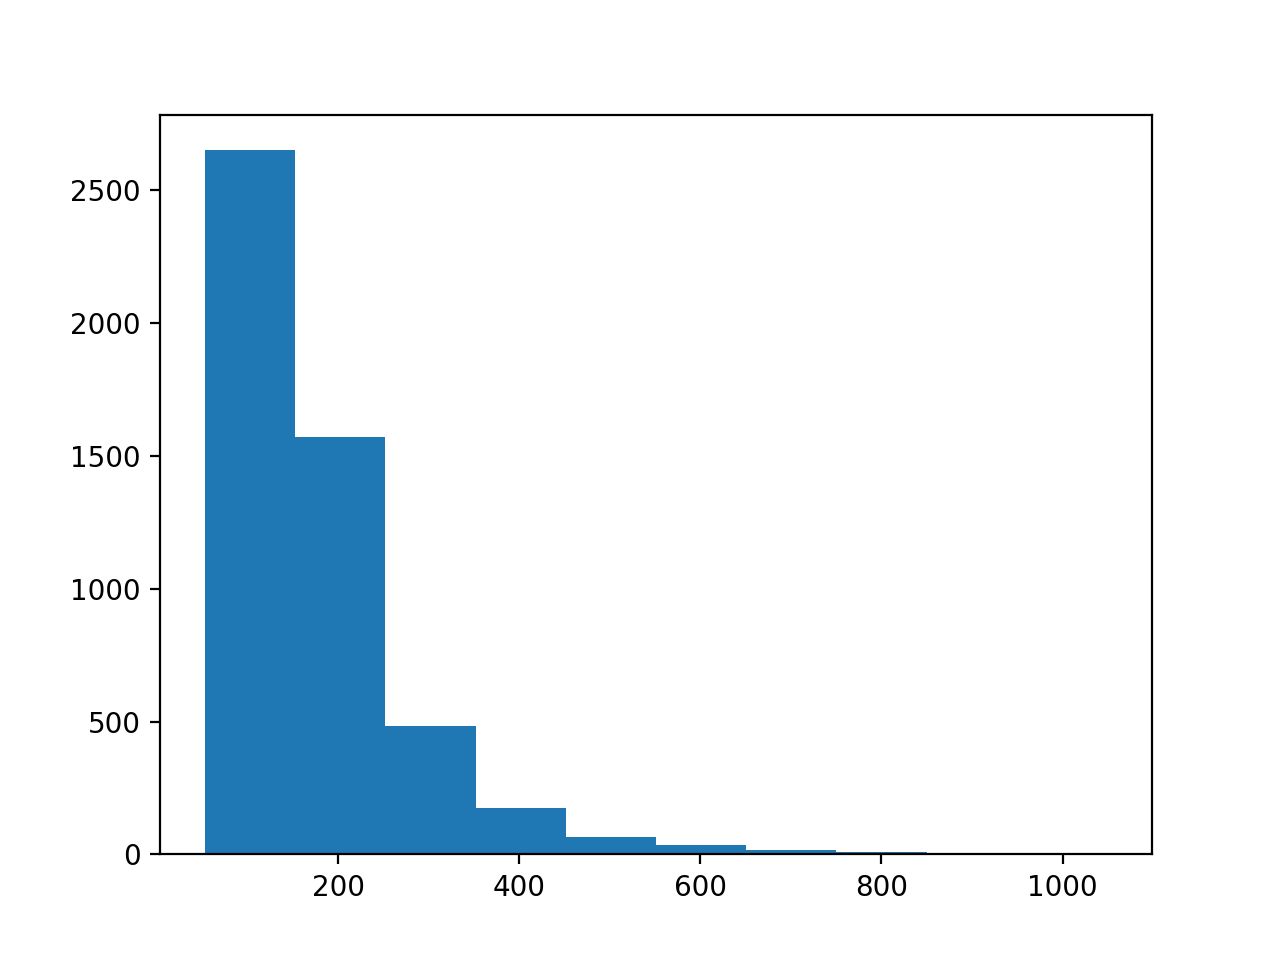

In [88]:
i=0
max_duration = ripples.loc[i,'time'].shape[0]

print(max_duration)
ripple_length = 550

plt.figure()
plt.hist(ripples.duration_index)
plt.show()

In [89]:
#Centering

ripples['lfp'] = ripples.apply(lambda row: row['lfp']-row['lfp'].mean(), axis=1)


#Zero padding

# ripples['lfp'] = ripples.apply(lambda row: np.pad(row['lfp'], ((0,int(max_duration-row['lfp'].shape[0])), (0,0)), 'constant', constant_values=0), axis=1)

In [113]:
def perform_high_pass_filter(lfp, low_cut_frequency, high_cut_frequency, sf):
            wn = sf / 2.
            b, a = signal.butter(5, [low_cut_frequency/wn, high_cut_frequency/wn], 'bandpass')
            lfp = signal.filtfilt(b, a, lfp)
            return lfp


label = np.array(ripples.labels)
lfp = np.array((ripples.lfp))

max_amp = list()
for i in range(label.shape[0]):
    sig = lfp[i].flatten()
    sig = perform_high_pass_filter(sig, 100, 250, 2500)
    analytic_signal = hilbert(sig)
    amplitude_envelope = np.abs(analytic_signal)
    max_amp.append(analytic_signal.max())
max_amp = np.array(max_amp)

In [115]:
np.corrcoef(label, max_amp)

array([[1.        +0.j       , 0.46349616+0.0233777j],
       [0.46349616-0.0233777j, 1.        +0.j       ]])

<IPython.core.display.Javascript object>


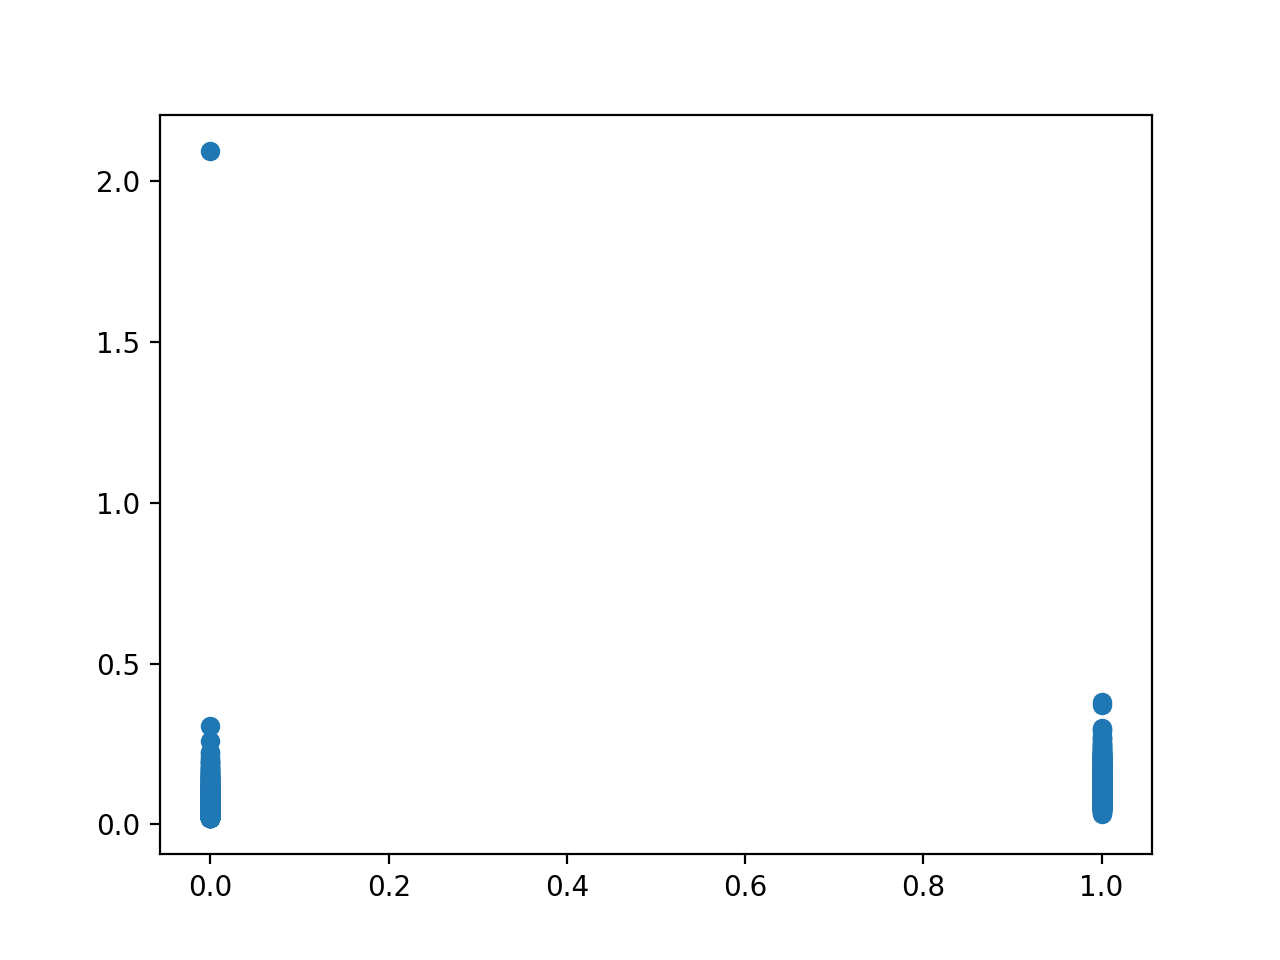

/Users/astasik/anaconda3/envs/machine/lib/python3.6/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


1.0


<IPython.core.display.Javascript object>


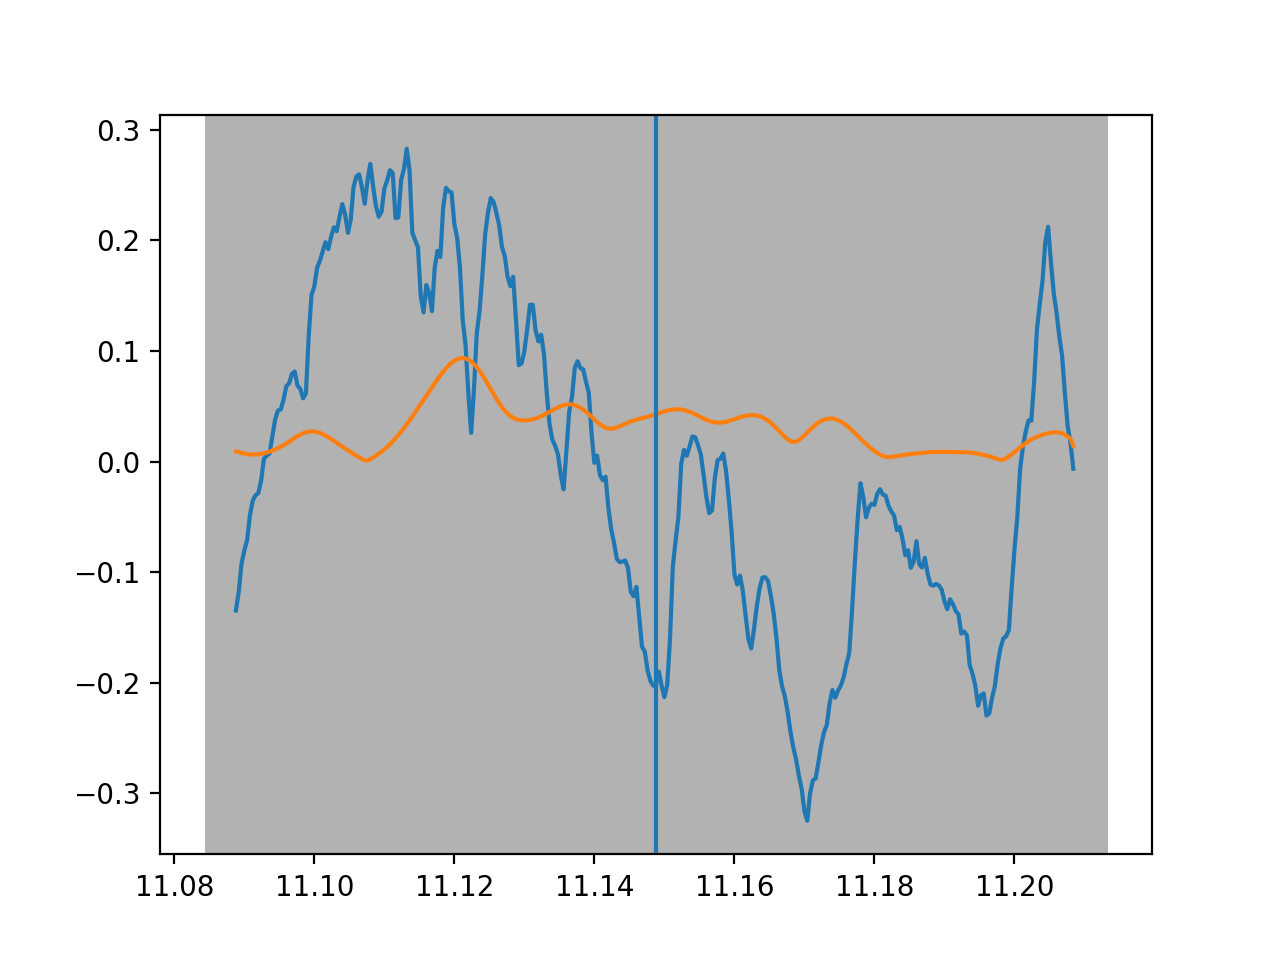

[]

In [90]:
i=15

print(ripples.loc[i,'labels'])



sig = ripples.loc[i,'lfp'].flatten()
sig = perform_high_pass_filter(sig, 100, 250, 2500)
analytic_signal = hilbert(sig)
amplitude_envelope = np.abs(analytic_signal)



plt.figure()
plt.plot(ripples.loc[i,'time'], ripples.loc[i,'lfp'].flatten())
plt.plot(ripples.loc[i,'time'], amplitude_envelope)
plt.axvline(x=ripples.loc[i,'center'])
plt.axvspan(ripples.loc[i,'start_time'], ripples.loc[i,'end_time'], alpha=0.3, color='black', lw=0.2)
plt.plot()

In [91]:
X = np.zeros((len(ripples), int(max_duration), 1))
y = np.zeros((len(ripples)))

In [92]:
lfp = np.array(ripples.lfp)
labels = np.array(ripples.labels)

for i in range(len(lfp)):
    duration = lfp[i].shape[0]
    X[i,:duration,:] = lfp[i][:duration,:]
    y[i] = labels[i]

In [93]:
directory = os.path.join('..', 'data', 'final_data')

if not os.path.exists(directory):
    os.makedirs(directory)

length_cum = np.cumsum(length)
    
np.save(os.path.join(directory, 'X_train.npy'), X[:length_cum[3],:, :])
np.save(os.path.join(directory, 'y_train.npy'), y[:length_cum[3]])

np.save(os.path.join(directory, 'X_test.npy'), X[length_cum[3]:,:, :])
np.save(os.path.join(directory, 'y_test.npy'), y[length_cum[3]:])


# np.save(os.path.join(directory, 'X_test.npy'), X[:length_cum[0],:, :])
# np.save(os.path.join(directory, 'y_test.npy'), y[:length_cum[0]])

# np.save(os.path.join(directory, 'X_train.npy'), X[length_cum[0]:,:, :])
# np.save(os.path.join(directory, 'y_train.npy'), y[length_cum[0]:])

np.save(os.path.join(directory, 'X.npy'), X)
np.save(os.path.join(directory, 'y.npy'), y)

84.0

array([ 865, 1933, 2806, 3866, 5007])